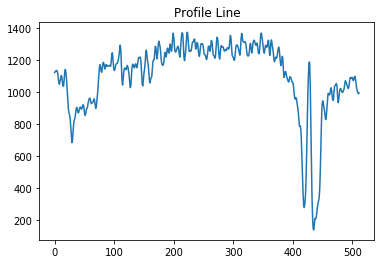

Variance:  134932.4790411623
Mean:  949.9877662658691


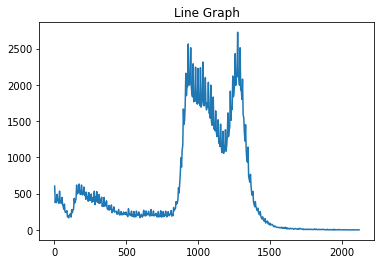

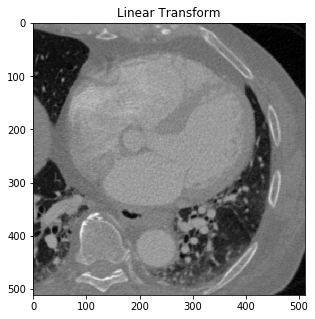

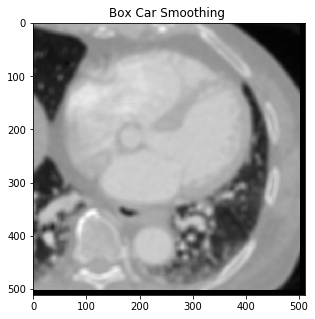

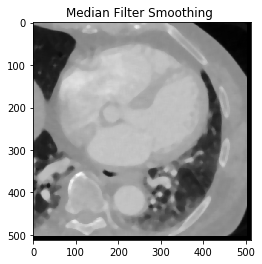

In [10]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import array
import pylab as p
import math 
import statistics


#Reading data from the file and reshaping it into 512 * 512 matrix
angioGraph = np.memmap("slice150.raw", dtype='int16', shape=(512,512))


######################################################################
#a: Profile line
######################################################################


i = 0
while i<len(angioGraph):
    i+=1
    if i == 255:
        profileList = angioGraph[i]
        break

    
plt.title('Profile Line')
plt.plot(profileList)
plt.show()

######################################################################
#b: Calculating the mean and variance of the matrix
######################################################################

print("Variance: ", np.var(angioGraph))

print("Mean: ", np.mean(angioGraph))


######################################################################
#c: Histogram 
######################################################################


y,binEdges=np.histogram(angioGraph,bins=500)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
p.title('Line Graph')
p.plot(bincenters,y,'-')
p.show()


####################
# Linear Transform #
####################

#Rescale values with a linear transformation.
f = open("slice150.raw", "rb")
i = 0
j = 0
new={}
linear = {}
for i in range(len(angioGraph)):
    for j in range(len(angioGraph)):
        dim = f.read(2)
        new[i,j] = int.from_bytes(dim, byteorder="little")
        linear[i, j] = (new[i,j]*255/6)
    
    
plt.figure(figsize=(5, 5))

plt.title('Linear Transform')

plt.imshow(array([f for f in linear.values()]).reshape(512, 512), cmap="gray")



#######################
# Nonlinear Transform #
#######################
#Rescale values with a nonlinear transformation.

i = 0
j = 0

nonlinear = {}
for i in range(len(angioGraph)):
    for j in range(len(angioGraph)):
       
        nonlinear[i, j] = (math.pow(new[i,j],2)*255/math.pow(6,2))
    
    
plt.figure(figsize=(5, 5))

plt.title('Nonlinear Transform')

plt.imshow(array([f for f in nonlinear.values()]).reshape(512, 512), cmap="gray")


#####################################################################
#f: Box Car                                                         #
#####################################################################


sml_mat = 11
big_mat = 512

outMatrix = np.zeros((big_mat,big_mat))

def BoxCar(angioGraph, outMatrix):

	for i in range(0,big_mat):
        # check for row boundary
		if((big_mat-i)>(sml_mat-1)):
			for j in range(0,big_mat):
                # check for column boundary
				if((big_mat-j)>(sml_mat-1)):
					sum = 0
					for row in range(i,i+sml_mat):
						for col in range(j,j+sml_mat):
							sum = sum + angioGraph[row][col]
                   #filter values
					val = sum/(sml_mat * sml_mat)
					outMatrix[i][j] = val
	

 
BoxCar(angioGraph, outMatrix)
plt.title('Box Car Smoothing ')
plt.imshow(outMatrix, cmap="gray" )
plt.show()


#####################################################################
#g:Median Filter                                                    #
#####################################################################
def median(data):
    data.sort()
    mid = len(data) // 2
    return (data[mid] + data[~mid]) / 2





medianMatrix = np.zeros((big_mat,big_mat))

def MedianFilter(angioGraph, outMatrix):

	for i in range(0,big_mat):
        # check for row boundary
		if((big_mat-i)>(sml_mat-1)):
			for j in range(0,big_mat):
                # check for column boundary
				if((big_mat-j)>(sml_mat-1)):
					matrix = []
					for row in range(i,i+sml_mat):
						for col in range(j,j+sml_mat):
							matrix.append(angioGraph[row][col])
                            
							
                   #filter values
					val = median(matrix)
					medianMatrix[i][j] = val
	

 
MedianFilter(angioGraph, outMatrix)
plt.title('Median Filter Smoothing ')
plt.imshow(medianMatrix, cmap="gray" )
plt.show()
    




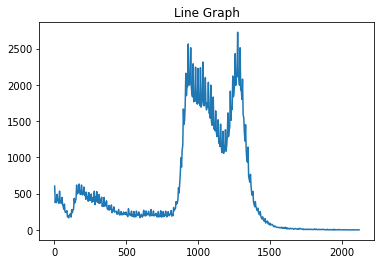

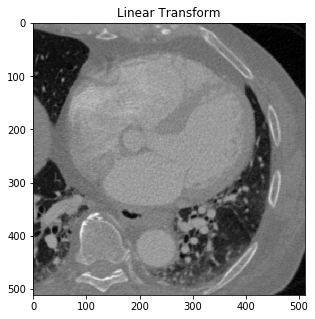

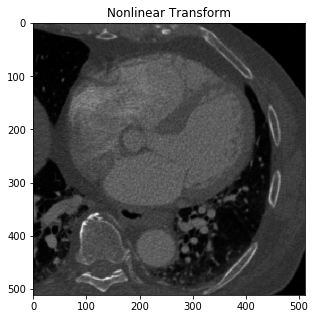

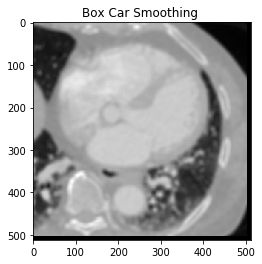

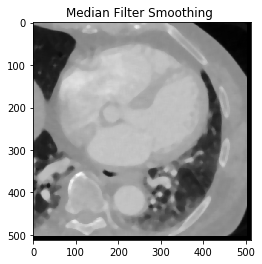

In [ ]:
medianMatrix = np.zeros((big_mat,big_mat))

def MedianFilter(angioGraph, outMatrix):

	for i in range(0,big_mat):
        # check for row boundary
		if((big_mat-i)>(sml_mat-1)):
			for j in range(0,big_mat):
                # check for column boundary
				if((big_mat-j)>(sml_mat-1)):
					matrix = []
					for row in range(i,i+sml_mat):
						for col in range(j,j+sml_mat):
							matrix.append(angioGraph[row][col])
                            
							
                   #filter values
					val = statistics.median(matrix)
					medianMatrix[i][j] = val
	

 
MedianFilter(angioGraph, outMatrix)
plt.title('Median Filter Smoothing ')
plt.imshow(medianMatrix, cmap="gray" )
plt.show()